# Simple Walk 2D continuous

base environment on https://github.com/nicknochnack/ReinforcementLearningCourse/blob/main/Project%203%20-%20Custom%20Environment.ipynb

continuous state space environment

action space: BOX in two directions from -1 to 1

state space: box with shape(2,1)?

goal reached when distance closer than 1





## 1. Import Dependencies

In [97]:
import gym 
from gym import Env
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 
import numpy as np
import random
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy

import matplotlib.pyplot as plt

# logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)


In [98]:
test_box = Box(low=0.0, high=10.0, shape=(2,2))
print(test_box)
print(type(test_box))
print(test_box.sample())
print(type(test_box.sample()))
print(test_box.sample().shape)

Box([[0. 0.]
 [0. 0.]], [[10. 10.]
 [10. 10.]], (2, 2), float32)
<class 'gym.spaces.box.Box'>
[[6.596005 9.449812]
 [9.6659   4.664601]]
<class 'numpy.ndarray'>
(2, 2)


In [99]:
state = np.ndarray(shape=(2,2), dtype=np.float32)
print(state)
print(type(state))
state = np.random.uniform(0.0, 10.0, 2)
print(state)
print(type(state))

[[4.1856794 6.7500668]
 [4.8457003 3.4847832]]
<class 'numpy.ndarray'>
[8.55051229 3.61406765]
<class 'numpy.ndarray'>


In [100]:
state = np.random.uniform(0.0, 10.0, (2,2))
print(state)
print(state[0])
distance = np.linalg.norm(state[0] - state[1])
print(distance)

[[1.18617727 3.04758944]
 [3.76813306 3.45537529]]
[1.18617727 3.04758944]
2.6139596480265777


In [101]:
def out_of_bounds(state):
    return not (0.0 <= state[0] <= 10.0 and 0.0 <= state[1] <= 10.0)

position = np.random.uniform(-10.0, 10.0, (2,))
print(position)
print(out_of_bounds(position))


[1.63545849 4.26277592]
False


In [102]:
# safe array test
random_numpy1 = np.random.uniform(0.0, 10.0, (2,))
random_numpy2 = np.random.uniform(0.0, 10.0, (2,))
state_array = []
print(state_array)
state_array.append(random_numpy1.tolist())
print(state_array)
state_array.append(random_numpy2.tolist())
print(state_array)


[]
[[0.09493861077827015, 0.582544955412071]]
[[0.09493861077827015, 0.582544955412071], [9.911434075357477, 2.905606312099901]]


In [131]:
class SimpleWalk2Dcont(Env):
    """simple walk environment in 2D with a continuous action and state space"""
    def __init__(self):
        self.x_min = 0.0
        self.x_max = 10.0
        self.action_space = Box(low=-1.0, high=1.0, shape=(2, ))
        self.observation_space = Box(low=self.x_min, high=self.x_max, shape=(2, 2)) # 0 position, 1 goal
        self.state = np.ndarray(shape=(2,2), dtype=np.float32)
        # safe past states in an array, safe x and y positions
        self.state_array = [[], []] # x, y
        
        
    
    def step(self, action):
        # update position
        self.state[0] += action
        self.__append_state()

        
        distance_to_goal = np.linalg.norm(state[0] - state[1])
        
        if self.__out_of_bounds():
            # went out of bounds
            reward = -10.0
            done = True
        elif distance_to_goal < 1:
            # reached goal
            reward = 10.0
            logging.debug("reached goal")
            done = True
        else:
            # stepping is penalized
            reward = -0.1
            done = False
        return self.state, reward, done, {}
    
    def reset(self):
        self.state = np.random.uniform(self.x_min, self.x_max, (2,2))
        self.__append_state()
        return self.state
    
    def render(self):
        logging.debug("visited states: ", self.state_array)
        logging.debug("goal: ", self.state[1])
        
        # plot
        fig, ax = plt.subplots()

        ax.plot(self.state_array[0], self.state_array[1], linewidth=2.0)

        # ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
            # ylim=(0, 8), yticks=np.arange(1, 8))

        plt.show()
        
    
    def __out_of_bounds(self):
        """check if the current state is out of bounds"""
        position = self.state[0]
        for element in position:
            if not (self.x_min <= element <= self.x_max):
                logging.debug("out of bounds")
                return True
            else:
                return False
            
    def __append_state(self):
        self.state_array[0].append(self.state[0][0])
        self.state_array[1].append(self.state[0][1])
    
env = SimpleWalk2Dcont()

print(env.action_space.sample())
print(env.observation_space.sample())

[-0.8369666   0.50027084]
[[2.4394424 8.234026 ]
 [9.650285  5.240392 ]]


DEBUG:root:out of bounds
INFO:root:Episode:1 Score:-12.8
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 1083, in emit
    msg = self.format(record)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 927, in format
    return fmt.format(record)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 663, in format
    record.message = record.getMessage()
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "c:\Users\Luttk\.vscode-insiders\extensions\ms-toolsai.jupyter-2022.1.1001614873\pythonFiles\vscode_datascience_helpers\kernel_prewarm_starter.py", line 31, in <module>
    runpy.run_module(module, run_name="__main__", alter_sys=False)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\runpy.py", line 213

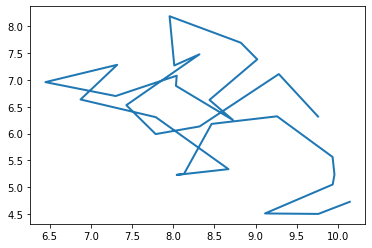

DEBUG:root:out of bounds
INFO:root:Episode:2 Score:-10.4
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 1083, in emit
    msg = self.format(record)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 927, in format
    return fmt.format(record)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 663, in format
    record.message = record.getMessage()
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "c:\Users\Luttk\.vscode-insiders\extensions\ms-toolsai.jupyter-2022.1.1001614873\pythonFiles\vscode_datascience_helpers\kernel_prewarm_starter.py", line 31, in <module>
    runpy.run_module(module, run_name="__main__", alter_sys=False)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\runpy.py", line 213

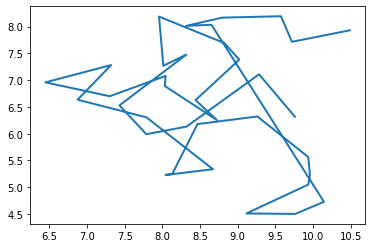

DEBUG:root:out of bounds
INFO:root:Episode:3 Score:-10.2
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 1083, in emit
    msg = self.format(record)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 927, in format
    return fmt.format(record)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 663, in format
    record.message = record.getMessage()
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "c:\Users\Luttk\.vscode-insiders\extensions\ms-toolsai.jupyter-2022.1.1001614873\pythonFiles\vscode_datascience_helpers\kernel_prewarm_starter.py", line 31, in <module>
    runpy.run_module(module, run_name="__main__", alter_sys=False)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\runpy.py", line 213

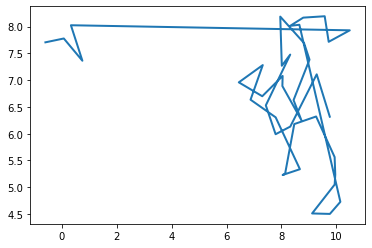

DEBUG:root:out of bounds
INFO:root:Episode:4 Score:-10.4
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 1083, in emit
    msg = self.format(record)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 927, in format
    return fmt.format(record)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 663, in format
    record.message = record.getMessage()
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "c:\Users\Luttk\.vscode-insiders\extensions\ms-toolsai.jupyter-2022.1.1001614873\pythonFiles\vscode_datascience_helpers\kernel_prewarm_starter.py", line 31, in <module>
    runpy.run_module(module, run_name="__main__", alter_sys=False)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\runpy.py", line 213

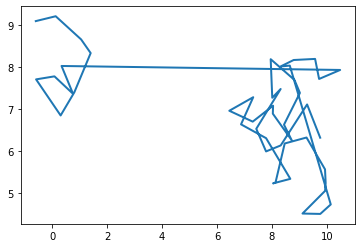

DEBUG:root:out of bounds
INFO:root:Episode:5 Score:-10.7
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 1083, in emit
    msg = self.format(record)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 927, in format
    return fmt.format(record)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 663, in format
    record.message = record.getMessage()
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\logging\__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "c:\Users\Luttk\.vscode-insiders\extensions\ms-toolsai.jupyter-2022.1.1001614873\pythonFiles\vscode_datascience_helpers\kernel_prewarm_starter.py", line 31, in <module>
    runpy.run_module(module, run_name="__main__", alter_sys=False)
  File "C:\Users\Luttk\anaconda3\envs\rl-test\lib\runpy.py", line 213

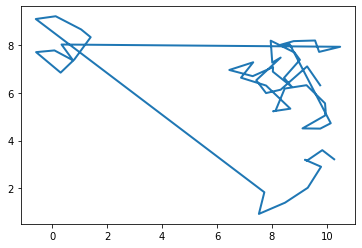

In [133]:
env = SimpleWalk2Dcont()
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        # env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    logging.info('Episode:{} Score:{}'.format(episode, score))
    env.render()
env.close()

In [44]:
log_path = os.path.join('Training', 'Logs')

In [45]:
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [46]:
model.learn(total_timesteps=4000)

Logging to Training\Logs\PPO_11
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15.4     |
|    ep_rew_mean     | -11.4    |
| time/              |          |
|    fps             | 572      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.8        |
|    ep_rew_mean          | -12.5       |
| time/                   |             |
|    fps                  | 500         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.019056141 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.81       |
|    explained_variance   | -0.00773    

In [47]:
model.save('PPO')

In [49]:
evaluate_policy(model, env, n_eval_episodes=10, render=False)

C:\Users\Luttk\anaconda3\envs\rl-test\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


KeyboardInterrupt: 